In [1]:
#Импортируем необходимые библиотеки
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
#Новые библиотеки с выделенными функциями
import mv_tools as mvt
import solver
warnings.filterwarnings('ignore')

Датасет взят из следующего источника: https://www.openml.org/search?type=data&sort=runs&status=active&order=desc&qualities.NumberOfClasses=%3D_2&qualities.NumberOfFeatures=lte_10&qualities.NumberOfInstances=lte_1000&id=1005,
также может быть найден (в ином формате) по следующей ссылке: https://archive.ics.uci.edu/dataset/42/glass+identification

# Считываем датасет из файла, отдельно метки, отдельно признаки

In [2]:
features = []
with open('Datasets/glass.arff','r') as f1:
    for line in f1:
        if line[0].isdigit():
            if line[-1]=='\n':
                data = line[:-1].split(',')
            else:
                data = line.split(',')
            features.append(data)
            for i in range(len(features[-1])):
                try:
                    features[-1][i]=float(features[-1][i])
                except:
                    pass
                    
F=pd.DataFrame(features, columns=['RI','NA','Mg','Al','Si','K','Ca','Ba','Fe','labels'])  

In [3]:
F

,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe,labels
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,N
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,N
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,N
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,N
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,P
...,...,...,...,...,...,...,...,...,...,...
209,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00,N
210,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00,P
211,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14,P
212,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00,P


In [4]:
F1=F.drop(columns=['labels'])

In [5]:
F1.corr().round(2)

,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.00,-0.19,-0.12,-0.41,-0.54,-0.29,0.81,-0.00,0.14
NA,-0.19,1.00,-0.27,0.16,-0.07,-0.27,-0.28,0.33,-0.24
Mg,-0.12,-0.27,1.00,-0.48,-0.17,0.01,-0.44,-0.49,0.08
Al,-0.41,0.16,-0.48,1.00,-0.01,0.33,-0.26,0.48,-0.07
Si,-0.54,-0.07,-0.17,-0.01,1.00,-0.19,-0.21,-0.10,-0.09
K,-0.29,-0.27,0.01,0.33,-0.19,1.00,-0.32,-0.04,-0.01
Ca,0.81,-0.28,-0.44,-0.26,-0.21,-0.32,1.00,-0.11,0.12
Ba,-0.00,0.33,-0.49,0.48,-0.10,-0.04,-0.11,1.00,-0.06
Fe,0.14,-0.24,0.08,-0.07,-0.09,-0.01,0.12,-0.06,1.00


In [6]:
np.linalg.det(F1.corr().round(2).values)

0.0004827752432423349

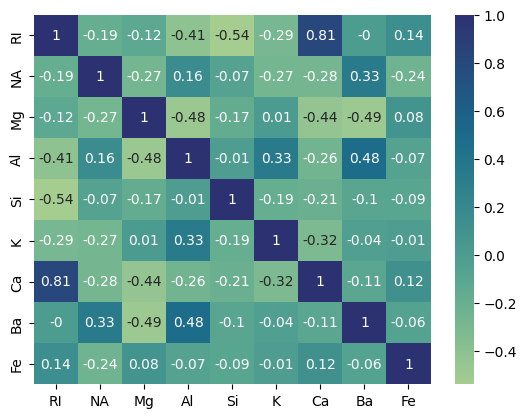

In [7]:
dataplot = sns.heatmap(F1.corr().round(2), cmap="crest", annot=True)

# Тест на нормальное распределение признаков

In [8]:
for col in F1.columns:
    print(stats.shapiro(F1[col]))

ShapiroResult(statistic=0.8675722824224852, pvalue=1.0766712928974077e-12)
ShapiroResult(statistic=0.945762306985968, pvalue=3.4655426922939914e-07)
ShapiroResult(statistic=0.6993364173009177, pvalue=2.390921270062536e-19)
ShapiroResult(statistic=0.9434125977963359, pvalue=2.083156241596038e-07)
ShapiroResult(statistic=0.9196619139626916, pvalue=2.175031659381859e-09)
ShapiroResult(statistic=0.44161768779031496, pvalue=2.172188035682615e-25)
ShapiroResult(statistic=0.793867908360201, pvalue=4.286584041376024e-16)
ShapiroResult(statistic=0.4085650688572169, pvalue=5.383301973907288e-26)
ShapiroResult(statistic=0.6532001093351217, pvalue=1.1566680199469558e-20)


In [9]:
F_np=F1.values

In [10]:
log_F = np.log(F_np+np.full(F_np.shape, 1e-6))

In [11]:
log_F

array([[  0.41734822,   2.54866369,   1.25276325, ...,   2.17133692,
        -13.81551056, -13.81551056],
       [  0.41635955,   2.49815196,   1.25846127, ...,   2.14358948,
        -13.81551056, -13.81551056],
       [  0.41734822,   2.58097419,   1.24703258, ...,   2.13179689,
        -13.81551056, -13.81551056],
       ...,
       [  0.4161617 ,   2.63332673,   1.25846127, ...,   2.0719134 ,
        -13.81551056,  -1.96610571],
       [  0.41666285,   2.53923707,   1.05779064, ...,   2.14476112,
        -13.81551056, -13.81551056],
       [  0.41773683,   2.6454654 ,   0.783902  , ...,   2.23216274,
        -13.81551056, -13.81551056]])

In [12]:
for i in range(len(log_F[0])):
    print(stats.shapiro(log_F[:,i]))

ShapiroResult(statistic=0.8686667828674778, pvalue=1.234798136482314e-12)
ShapiroResult(statistic=0.9500171432905523, pvalue=8.999987755403209e-07)
ShapiroResult(statistic=0.509504463760901, pvalue=4.728342272449703e-24)
ShapiroResult(statistic=0.9427557974066859, pvalue=1.810823766350035e-07)
ShapiroResult(statistic=0.9168881205723496, pvalue=1.3516776555211859e-09)
ShapiroResult(statistic=0.5490436690607463, pvalue=3.322791178791935e-23)
ShapiroResult(statistic=0.8648062221124744, pvalue=7.641256310836631e-13)
ShapiroResult(statistic=0.47884894798056776, pvalue=1.131994804257362e-24)
ShapiroResult(statistic=0.6144322516821475, pvalue=1.1392992560383952e-21)


In [13]:
F_labels = list(F['labels'])
for i in range(len(F_labels)):
    if F_labels[i]=="N":
        F_labels[i] = 0
    if F_labels[i]=="P":
        F_labels[i] = 1

In [14]:
print(f"Число разных классов для датасета: {len(set(F_labels))}")

Число разных классов для датасета: 2


# Оценим, какая модель наилучшим образом решит задачу классификации для данного набора данных.

In [15]:
initial_results = solver.initial_estimates(F_np, F_labels)
methods = ['Случайный лес','CatBoost','LightGBM','AdaBoost']

Параметры для случайного леса: {'max_depth': None, 'n_estimators': 200}
Параметры для CatBoost: {'depth': 6, 'iterations': 300, 'learning_rate': 0.1}
Параметры для LightGBM: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300}
Параметры для AdaBoost: {'n_estimators': 200}


In [16]:
initial_results_df=pd.DataFrame(initial_results, columns=['F1-мера', 'Precision', 'Recall', 'ROC-AUC'], index=methods)

In [17]:
initial_results_df.sort_values(by=['F1-мера'],ascending=False).round(decimals=3)

,F1-мера,Precision,Recall,ROC-AUC
LightGBM,0.751,0.759,0.750,0.870
CatBoost,0.750,0.794,0.711,0.906
Случайный лес,0.741,0.855,0.657,0.887
AdaBoost,0.692,0.714,0.683,0.773


# Добавим пропуски в данные (60% по столбцам 2-5, 8-9)

In [18]:
# Создаем версию датасета с абсолютно случайными пропусками, т.е. независящими от наблюдаемых данных, 60% пропусков
D_MCAR = mvt.MCAR(F_np, [1,2,3,4,7,8], [int(6*len(F_np)/10)]*6)
Full_D_MCAR = {}
Full_D_MCAR['mean_fill'] = mvt.mean_fill(D_MCAR)
Full_D_MCAR['stoch_lr_fill'] = mvt.lr_fill(D_MCAR, noise=True)
Full_D_MCAR['em_fill'] = mvt.EM(D_MCAR)
Full_D_MCAR['bootstrap_fill'] = mvt.bootstrap_fill(D_MCAR)
Full_D_MCAR['KNN_fill'] = mvt.knn_fill(D_MCAR)
#Full_D_MCAR['KNN_fill2'] = mvt.knn_fill(D_MCAR, weights='distance')
Full_D_MCAR['iterative_fill_LR'] = mvt.iterative_fill(D_MCAR, 'LR')
Full_D_MCAR['iterative_fill_RF'] = mvt.iterative_fill(D_MCAR, 'RF')

In [19]:
# Создаем версию датасета со случайными пропусками, x_i,j становится пропуском, если x_i1 меньше квантиля 0.6 для признака x1
# j ∈ {2,3,4,5,8,9}
D_MAR = mvt.MAR(F_np, indicator=0, mis_cols=[1,2,3,4,7,8], thresh=np.quantile(F_np[:,0], 0.6), to_remove='<')
Full_D_MAR = {}
Full_D_MAR['mean_fill'] = mvt.mean_fill(D_MAR)
Full_D_MAR['stoch_lr_fill'] = mvt.lr_fill(D_MAR, noise=True)
Full_D_MAR['em_fill'] = mvt.EM(D_MAR)
Full_D_MAR['bootstrap_fill'] = mvt.bootstrap_fill(D_MAR)
Full_D_MAR['KNN_fill'] = mvt.knn_fill(D_MAR)
#Full_D_MAR['KNN_fill2'] = mvt.knn_fill(D_MAR, weights='distance')
Full_D_MAR['iterative_fill_LR'] = mvt.iterative_fill(D_MAR, 'LR')
Full_D_MAR['iterative_fill_RF'] = mvt.iterative_fill(D_MAR, 'RF')

In [20]:
# Создаем версию датасета со случайными пропусками, x_ij становится пропуском, если x_ij меньше квантиля 0.6 для признака x1
# j ∈ {2,3,4,5,8,9}
D_MNAR = mvt.MNAR(F_np, mis_cols={1:np.quantile(F_np[:,1], 0.6),
                                  2:np.quantile(F_np[:,2], 0.6),
                                  3:np.quantile(F_np[:,3], 0.6),
                                  4:np.quantile(F_np[:,4], 0.6), 
                                  7:np.quantile(F_np[:,7], 0.6),
                                  8:np.quantile(F_np[:,8], 0.6)},  to_remove='<')
Full_D_MNAR = {}
Full_D_MNAR['mean_fill'] = mvt.mean_fill(D_MNAR)
Full_D_MNAR['stoch_lr_fill'] = mvt.lr_fill(D_MNAR, noise=True)
Full_D_MNAR['em_fill'] = mvt.EM(D_MNAR)
Full_D_MNAR['bootstrap_fill'] = mvt.bootstrap_fill(D_MNAR)
Full_D_MNAR['KNN_fill'] = mvt.knn_fill(D_MNAR)
Full_D_MNAR['iterative_fill_LR'] = mvt.iterative_fill(D_MNAR, 'LR')
Full_D_MNAR['iterative_fill_RF'] = mvt.iterative_fill(D_MNAR, 'RF')

In [21]:
df_index = ['Заполнение средним', 'Стохастическое заполнение ЛР', 'EM-алгоритм', 'Бутстрап', 'Метод ближайших соседей', 'Итеративное заполнение, ЛР', 'Итеративное заполнение, случайный лес', 'LightGBM','Catboost']
df_index2 = ['Заполнение средним', 'Стохастическое заполнение ЛР', 'EM-алгоритм', 'Бутстрап', 'Метод ближайших соседей', 'Метод ближайших соседей, взвешенный', 'Итеративное заполнение, ЛР', 'Итеративное заполнение, случайный лес', 'LightGBM','Catboost']
df_columns = ['MCAR','MAR', 'MNAR']

# Решим задачу классификации, чтобы оценить качество заполнения.

In [22]:
MCAR_column = solver.estimates(Full_D_MCAR, F_labels).reshape(-1,1)
MAR_column = solver.estimates(Full_D_MAR, F_labels).reshape(-1,1)
MNAR_column = solver.estimates(Full_D_MNAR, F_labels).reshape(-1,1)

In [23]:
values=np.hstack((MCAR_column, MAR_column, MNAR_column))

In [24]:
overall_results=pd.DataFrame(values, columns=df_columns, index=df_index)

In [25]:
overall_results.round(decimals=3)

,MCAR,MAR,MNAR
Заполнение средним,0.695,0.694,0.684
Стохастическое заполнение ЛР,0.701,0.717,0.694
EM-алгоритм,0.729,0.723,0.653
Бутстрап,0.656,0.702,0.641
Метод ближайших соседей,0.681,0.730,0.690
"Итеративное заполнение, ЛР",0.722,0.714,0.676
"Итеративное заполнение, случайный лес",0.681,0.707,0.625
LightGBM,0.681,0.707,0.625
Catboost,0.696,0.759,0.632


In [26]:
proximity_array = np.zeros((len(df_index)-2, len(df_columns)))
for i, item in enumerate(Full_D_MCAR.keys()):
    proximity_array[i,0] = solver.proximity_estimate(F_np, Full_D_MCAR[item], D_MCAR)
for i, item in enumerate(Full_D_MAR.keys()):
    proximity_array[i,1] = solver.proximity_estimate(F_np, Full_D_MAR[item], D_MAR)
for i, item in enumerate(Full_D_MNAR.keys()):
    proximity_array[i,2] = solver.proximity_estimate(F_np, Full_D_MNAR[item], D_MNAR)
df_proximity = pd.DataFrame(proximity_array, columns=df_columns, index=df_index[:-2])

In [27]:
df_proximity.round(decimals=3)

,MCAR,MAR,MNAR
Заполнение средним,0.029,0.030,0.044
Стохастическое заполнение ЛР,0.027,0.034,0.046
EM-алгоритм,0.025,0.032,0.041
Бутстрап,0.038,0.042,0.048
Метод ближайших соседей,0.023,0.028,0.041
"Итеративное заполнение, ЛР",0.031,0.036,0.043
"Итеративное заполнение, случайный лес",0.025,0.028,0.045


In [29]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(F_np, F_labels, stratify=F_labels, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(F_np.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [34]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.031 seconds


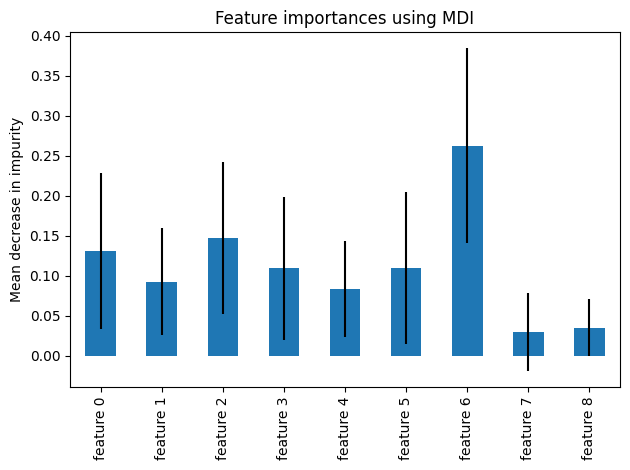

In [35]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()